In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

## K次交叉驗證(K-fold cross-validation)

In [ ]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df_data = pd.DataFrame(boston['data'],columns=boston.feature_names)
df_target = pd.DataFrame(boston['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

In [ ]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2', reg_all.score(X_test, y_test))
print('RMSE: \n', rmse)

R^2 0.7112260057484974
RMSE: 
 4.638689926172788


In [ ]:
cv_results = cross_val_score(reg_all, X_train, y_train, cv=10)

In [ ]:
print(cv_results)
print("Average 10-Fold CV Score: {:.4f}".format(np.mean(cv_results)))

[0.70959865 0.76558212 0.22459595 0.79719424 0.74179327 0.78747687
 0.80023421 0.73001495 0.77970143 0.53915526]
Average 10-Fold CV Score: 0.6875


## 接收者操作特征曲線(ROC Curve)

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


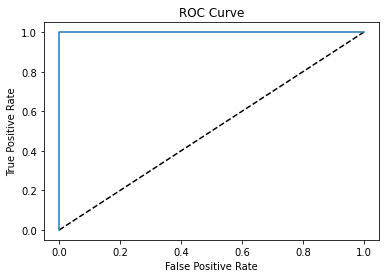

In [ ]:
iris = datasets.load_iris()
df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df_data[0:100],
                                                    df_target[0:100],
                                                    test_size = 0.4,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[23  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

1.0
